### Zonal statistics
Quite often you have a situtation when you want to summarize raster datasets based on vector geometries. Rasterstats is a Python module that helps to acheive this easily when using geopandas and rasterio.

In [1]:
import rasterio as rio
import rasterstats
from rasterio.plot import show
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd

In [2]:
# Read in Forest height raster with rasterio.

height_raster_path = 'data/GEDI_LandSat_Raster/Forest_Height_2019.tif'

height_raster = rio.open(height_raster_path)

In [3]:
# Read in regional ecosystem polygon as geopandas dataframe. 

RE_df_path = "data/RE_Polygons/RE_Polygons.shp"

RE_df = gpd.read_file(RE_df_path)

In [4]:
RE_df

,RE,geometry
0,12.12.3,"POLYGON ((152.95685 -27.46327, 152.95688 -27.4..."
1,12.12.3,"POLYGON ((152.84105 -27.48002, 152.84091 -27.4..."
2,12.12.2,"POLYGON ((152.64563 -26.88608, 152.64589 -26.8..."
3,12.12.7,"POLYGON ((152.56762 -27.11359, 152.56725 -27.1..."
4,12.12.9,"POLYGON ((152.43585 -27.23161, 152.43585 -27.2..."
...,...,...
75,12.11.3a,"POLYGON ((152.68184 -27.36103, 152.68073 -27.3..."
76,12.11.3a,"POLYGON ((152.67588 -27.31152, 152.67590 -27.3..."
77,12.8.20,"POLYGON ((152.94104 -26.94102, 152.94084 -26.9..."
78,12.9-10.7,"POLYGON ((152.55382 -27.45326, 152.55437 -27.4..."


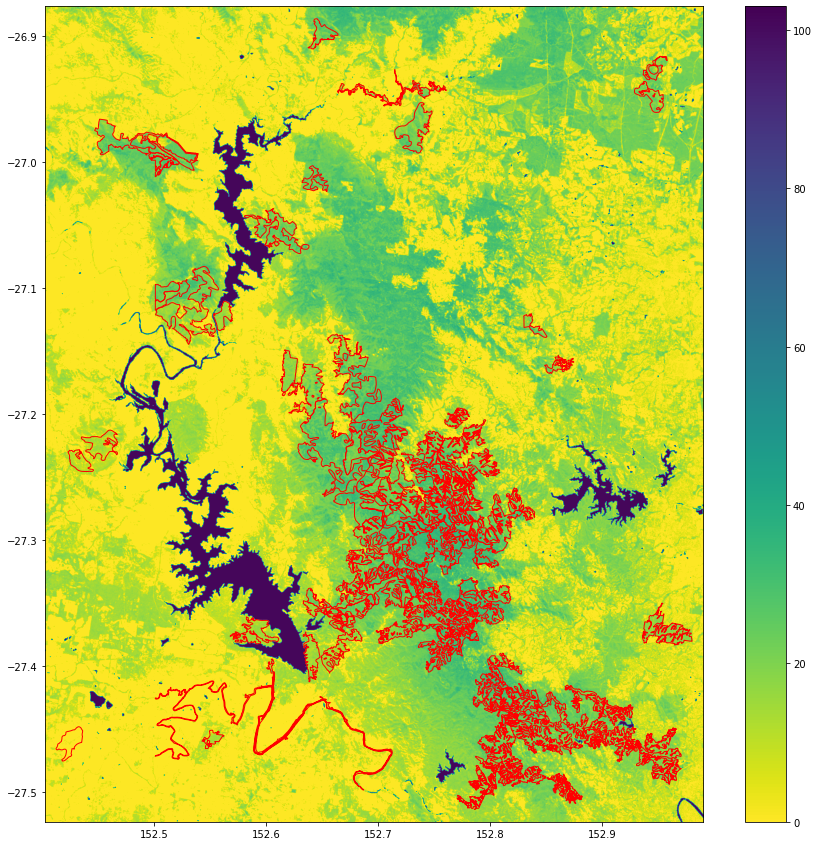

In [5]:
# Plott the raster and the vector data together.
fig, ax = plt.subplots(figsize = (15,15))



# Make a numpy array to get thew min and max values for color bar
height_array = height_raster.read(1)

# Nomalise color to min and max easter values
norm = colors.Normalize(vmin=height_array.min(), vmax=height_array.max())

# Plot raster
show(height_raster, ax = ax, cmap='viridis_r')
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis_r'), ax=ax)

# Plot vector data
RE_df.plot(ax = ax, facecolor = 'None', edgecolor = 'red')
plt.show()

In [18]:
RE_df_disolved = RE_df.dissolve(by='RE', aggfunc='sum', as_index = False)

In [19]:
RE_df_disolved

,RE,geometry
0,12.11.10,"MULTIPOLYGON (((152.83460 -27.42135, 152.83452..."
1,12.11.11,"MULTIPOLYGON (((152.60626 -27.03721, 152.60581..."
2,12.11.2,"MULTIPOLYGON (((152.78522 -27.36143, 152.78504..."
3,12.11.22,"MULTIPOLYGON (((152.63572 -27.16062, 152.63771..."
4,12.11.25,"MULTIPOLYGON (((152.97730 -27.37253, 152.97720..."
5,12.11.3,"MULTIPOLYGON (((152.80253 -27.40032, 152.80258..."
6,12.11.3a,"MULTIPOLYGON (((152.68073 -27.36077, 152.68024..."
7,12.11.5,"MULTIPOLYGON (((152.86176 -27.48581, 152.86169..."
8,12.11.6,"MULTIPOLYGON (((152.64426 -27.38110, 152.64460..."
9,12.12.13,"MULTIPOLYGON (((152.51733 -27.09494, 152.51754..."


In [23]:
# Assign raster values to a numpy nd array
height_array = height_raster.read(1)

affine = height_raster.transform

# Calculating the zonal statistics 
height_raster_zonal = rasterstats.zonal_stats(RE_df_disolved, height_array, affine = affine,
                                      stats = ['mean','std','max','min'], 
                                      geojson_out = True)

/home/tim/miniconda3/envs/uq-geo/lib/python3.8/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [24]:
# Extracting the average rainfall data from the list
height_stats = []

i = 0

while i < len(height_raster_zonal):
    height_stats.append(height_raster_zonal[i]['properties'])
    i = i + 1 

# Transfering the infromation from the list to a pandas DataFrame

avg_height_df = pd.DataFrame(height_stats)

In [25]:
avg_height_df

,RE,min,max,mean,std
0,12.11.10,0.0,43.0,28.215187,5.322217
1,12.11.11,0.0,36.0,22.818942,3.975365
2,12.11.2,5.0,43.0,31.180150,3.610108
3,12.11.22,0.0,36.0,17.604421,4.432507
4,12.11.25,0.0,24.0,17.432802,2.582203
5,12.11.3,0.0,42.0,27.594367,4.781130
6,12.11.3a,5.0,35.0,23.143145,3.112747
7,12.11.5,0.0,38.0,22.033231,4.214589
8,12.11.6,0.0,101.0,14.487420,4.244834
9,12.12.13,0.0,34.0,21.914054,4.888911


In [11]:
ax = avg_height_df.plot.bar(x='mean', y='RE', rot=0)

TypeError: no numeric data to plot